## Wir analysieren den Titanic-Datensatz

In [14]:
import warnings

warnings.filterwarnings('ignore')

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/2560px-RMS_Titanic_3.jpg">

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [16]:
# Titanic-Datensatz beschaffen
titanic_data = fetch_openml('titanic', version=1, as_frame=True).frame

# Überblick über den Datensatz
titanic_data.head()

pclass survived                                             name     sex  \
0     1.0        1                    Allen, Miss. Elisabeth Walton  female   
1     1.0        1                   Allison, Master. Hudson Trevor    male   
2     1.0        0                     Allison, Miss. Helen Loraine  female   
3     1.0        0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0        0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked  boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S     2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S    11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  None    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  None  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  None    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

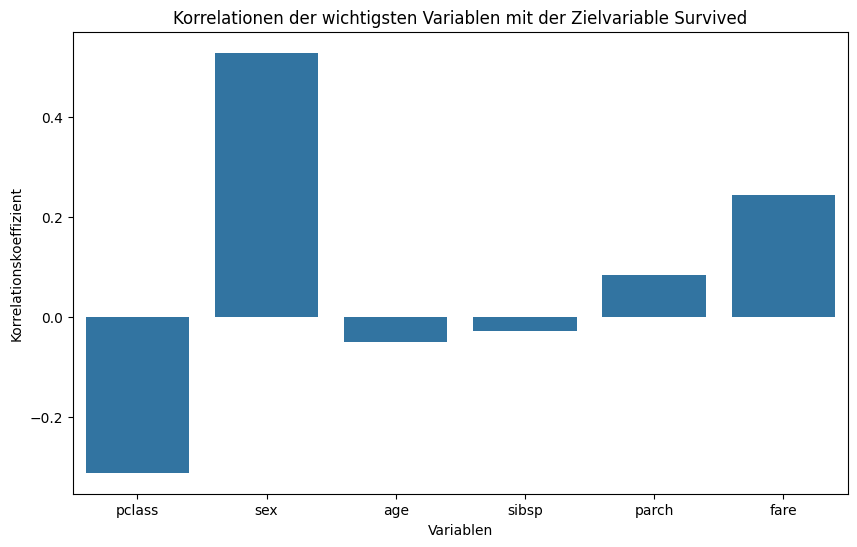

In [17]:
# Wichtige Variablen auswählen
variables = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']

# Sex-Variable in numerische Werte umwandeln
titanic_data['sex'] = titanic_data['sex'].map({'male': 0, 'female': 1})

# Fehlende Werte in der Altersvariable mit dem Durchschnittsalter auffüllen
titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)

# Korrelationen berechnen
correlations = titanic_data[variables + ['survived']].corr()

# Korrelationen mit der Zielvariable 'Survived' extrahieren
target_correlations = correlations['survived'].drop('survived')

# Plotten der Korrelationen
plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlations.index, y=target_correlations.values)
plt.title('Korrelationen der wichtigsten Variablen mit der Zielvariable Survived')
plt.ylabel('Korrelationskoeffizient')
plt.xlabel('Variablen')
plt.show()

Was wir hier sehen:
1. Reiche Leute überleben (niedrige pclass)
2. Frauen überleben (sex = 1)


Daraus bauen wir jetzt einen Klassifikator.

In [18]:
# Neue Spalte 'simple_ai' hinzufügen
titanic_data['simple_ai'] = ((titanic_data['pclass'] == 1) & (titanic_data['sex'] == 1)).astype(int)

# Überprüfen, ob die neue Spalte korrekt hinzugefügt wurde
titanic_data.head()

pclass survived                                             name sex  \
0     1.0        1                    Allen, Miss. Elisabeth Walton   1   
1     1.0        1                   Allison, Master. Hudson Trevor   0   
2     1.0        0                     Allison, Miss. Helen Loraine   1   
3     1.0        0             Allison, Mr. Hudson Joshua Creighton   0   
4     1.0        0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   1   

       age  sibsp  parch  ticket      fare    cabin embarked  boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S     2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S    11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  None    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  None  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  None    NaN   

                         home.dest  simple_ai  
0                     St Louis, MO          1  
1  Montreal, PQ / Chesterville, ON          0  
2  Montreal, PQ / Chesterville, ON          1  
3  Montreal, PQ / Chesterville, ON          0  
4  Montreal, PQ / Chesterville, ON          1

In [19]:
# Co-Occurrence-Matrix zwischen simple_ai und survived erstellen
co_occurrence_matrix = pd.crosstab(titanic_data['simple_ai'], titanic_data['survived'])

# Matrix anzeigen
print(co_occurrence_matrix)

survived     0    1
simple_ai          
0          804  361
1            5  139
